In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão de Python Neste Jupyter Notebook:', python_version())

Versão de Python Neste Jupyter Notebook: 3.10.5


A simulação de Monte Carlo (MCS) aplica amostragem aleatória repetida
(aleatoriedade) para obter resultados numéricos para resolução de problemas
determinísticos. É amplamente utilizado em otimização, integração numérica e
tomada de decisão baseada em risco. As funções de probabilidade e densidade
cumulativa são medidas estatísticas que aplicam distribuições de probabilidade
para variáveis aleatórias e podem ser usadas em conjunto com MCS para resolver
problemas determinísticos.

### Stock Simulations

O 1º exemplo é hipotético e simples, mas útil para demonstrar a aleatorização dos
dados. Começa com uma ação fictícia com preço de $ 20. Em seguida, projeta o
preço em 200 dias e plota.

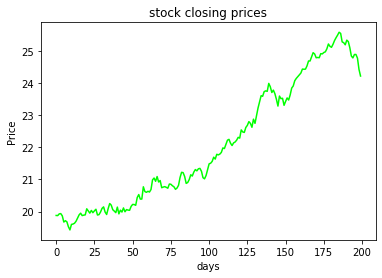

In [2]:
import matplotlib.pyplot as plt, numpy as np
from scipy import stats

def cum_price(p, d, m, s):
    data = []

    for d in range(d):
        prob = stats.norm.rvs(loc=m, scale=s)
        price = (p * prob)
        data.append(price)
        p = price

    return data
if __name__ == "__main__":
    stk_price, days, mean, s = 20, 200, 1.001, 0.005
    data = cum_price(stk_price, days, mean, s)
    plt.plot(data, color='lime')
    plt.ylabel('Price')
    plt.xlabel('days')
    plt.title('stock closing prices')
    plt.show()

Figura 2-1. gráfico aleatório simples

O código começa importando as bibliotecas matplotlib, numpy e scipy. Ele continua com a função cum_price(), que gera 200 números aleatórios
normalmente distribuídos (um para cada dia) com norm_rvs(). A aleatoriedade
dos dados é fundamental. O bloco principal cria as variáveis. A média é definida
um pouco acima de 1 e o (s) desvio (s) padrão (s) em um número muito pequeno
para gerar um preço de ação que aumenta lentamente. A média (mu) é a alteração média no valor. Desvio padrão é a variação ou dispersão nos dados. Com s de 0,005, nossos
dados têm muito pouca variação. Ou seja, os números em nosso conjunto de dados
são muito próximos uns dos outros. Lembre-se que este não é um cenário real! O
código continua plotando os resultados conforme mostrado na Figura 2-1.


O próximo exemplo adiciona MCS à mixagem com um loop while que itera 100 vezes:

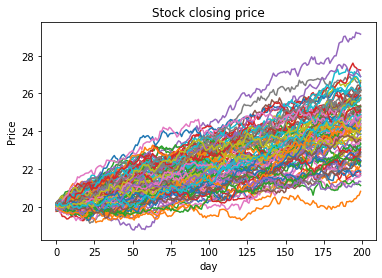

In [1]:
import matplotlib.pyplot as plt, numpy as np
from scipy import stats

def cum_price(p, d, m, s):
    data = []

    for d in range(d):
        prob = stats.norm.rvs(loc=m, scale=s)
        price = (p * prob)
        data.append(price)
        p = price

    return data

if __name__ == "__main__":
    stk_price, days, mu, sigma = 20, 200, 1.001, 0.005
    x = 0
    while x < 100:
        data = cum_price(stk_price, days, mu, sigma)
        plt.plot(data)
        x += 1

    plt.ylabel('Price')
    plt.xlabel('day')
    plt.title('Stock closing price')
    plt.show()

Figura 2-2. Gráfico aumentado de simulação de Monte Carlo

O loop while nos permite visualizar (como mostrado na Figura 2-2)
100 possíveis resultados de preços de ações em 200 dias. Observe que mu
(média) e sigma (desvio padrão) são usados. Este exemplo demonstra o
poder do MCS para a tomada de decisões.

#### Análise hipotética

A análise de variações hipotéticas altera os valores em um algoritmo para ver
como eles afetam os resultados. Certifique-se de alterar apenas uma variável por
vez, caso contrário, você não saberá o que causou a alteração. No exemplo anterior,
e se alterarmos os dias para 500, mantendo tudo o mais constante (o mesmo)? A
plotagem dessa mudança resulta no seguinte (Figura 2-3):

graph

Figura 2-3. Análise hipotética por 500 dias

Observe que a mudança no preço é mais lenta. Alterando mu (média) para 1,002
(não se esqueça de mudar os dias de volta para 200) resulta em mudanças mais rápidas
(médias maiores) como segue (Figura 2-4):

graph

Figura 2-4. Análise hipotética para mu = 1,002

Alterar sigma para 0,02 resulta em mais variação como segue (Figura 2-5):

graph

Figura 2-5. Análise hipotética para sigma = 0,02

### Simulação de Demanda de Produto

Uma probabilidade discreta é a probabilidade de cada valor aleatório discreto ocorrer em um
espaço amostral ou população. Uma variável aleatória assume valores diferentes determinados
pelo acaso. Uma variável aleatória discreta só pode assumir um número contável de valores.
Em contraste, uma variável aleatória contínua pode assumir um número incontável de
valores em uma linha intervalo, como uma distribuição normal.

No exemplo de código, a demanda por um produto fictício é prevista por quatro resultados
de probabilidade discretos: 10% dessa variável aleatória é de 10.000 unidades, 35% dessa
variável aleatória é de 20.000 unidades, 30% dessa variável aleatória é de 40.000 unidades e
25% dessa variável aleatória é de 40.000 unidades. variável é de 60.000 unidades. Simplesmente 10% da demanda de tempo é de 10.000, 35% da demanda de tempo é de 20.000,
30% da demanda de tempo é de 40.000 e 25% da demanda de tempo é de 60.000.
Os resultados discretos devem totalizar 100%. O código executa o MCS em um
algoritmo de produção que determina o lucro para cada resultado discreto e plota os
resultados.

Profit for 10,000 units: $25,000.00
Profit for 20,000 units: $45,825.20
Profit for 40,000 units: $57,827.80
Profit for 60,000 units: $45,394.80


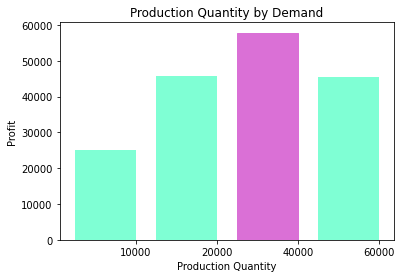

In [3]:
import matplotlib.pyplot as plt, numpy as np

def demand():
    p = np.random.uniform(0,1)
    if p < 0.10:
        return 10000
    elif p >= 0.10 and p < 0.45:
        return 20000
    elif p >= 0.45 and p < 0.75:
        return 40000
    else:
        return 60000

def production(demand, units, price, unit_cost, disposal):
    units_sold = min(units, demand)
    revenue = units_sold * price
    total_cost = units * unit_cost
    units_not_sold = units - demand
    
    if units_not_sold > 0:
        disposal_cost = disposal * units_not_sold
    else:
        disposal_cost = 0
    
    profit = revenue - total_cost - disposal_cost
    
    return profit

def mcs(x, n, units, price, unit_cost, disposal):
    profit = []

    while x <= n:
        d = demand()
        v = production(d, units, price, unit_cost, disposal)
        profit.append(v)
        x += 1

    return profit

def max_bar(ls):
    tup = max(enumerate(ls))
    return tup[0] - 1

if __name__ == "__main__":
    units = [10000, 20000, 40000, 60000]
    price, unit_cost, disposal = 4, 1.5, 0.2
    avg_p = []
    x, n = 1, 10000
    profit_10 = mcs(x, n, units[0], price, unit_cost, disposal)
    avg_p.append(np.mean(profit_10))
    print ('Profit for {:,.0f}'.format(units[0]),    
           'units: ${:,.2f}'.format(np.mean(profit_10)))
    
    profit_20 = mcs(x, n, units[1], price, unit_cost, disposal)
    avg_p.append(np.mean(np.mean(profit_20)))
    print ('Profit for {:,.0f}'.format(units[1]),
           'units: ${:,.2f}'.format(np.mean(profit_20)))
    
    profit_40 = mcs(x, n, units[2], price, unit_cost, disposal)
    avg_p.append(np.mean(profit_40))
    print ('Profit for {:,.0f}'.format(units[2]),
           'units: ${:,.2f}'.format(np.mean(profit_40)))
    
    profit_60 = mcs(x, n, units[3], price, unit_cost, disposal)
    avg_p.append(np.mean(profit_60))
    print ('Profit for {:,.0f}'.format(units[3]),
           'units: ${:,.2f}'.format(np.mean(profit_60)))
    
    labels = ['10000','20000','40000','60000']
    pos = np.arange(len(labels))
    width = 0.75 # set less than 1.0 for spaces between bins
    
    plt.figure(2)
    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    ax.set_xticklabels(labels)
    barlist = plt.bar(pos, avg_p, width, color='aquamarine')
    barlist[max_bar(avg_p)].set_color('orchid')
    plt.ylabel('Profit')
    plt.xlabel('Production Quantity')
    plt.title('Production Quantity by Demand')
    plt.show()

Figura 2-6. Visualização da quantidade de produção

O código começa importando as bibliotecas matplotlib e numpy. Continua
com quatro funções. A função demand() começa gerando aleatoriamente uma
probabilidade uniformemente distribuída. Ele continua retornando um dos quatro
resultados de probabilidade discreta estabelecidos pelo problema que desejamos
resolver. A função Production() retorna lucro com base em um algoritmo
que desenvolvi. Tenha em mente que qualquer algoritmo de base de lucro pode
ser substituído, o que ilumina a incrível flexibilidade do MCS. A função mcs() executa
a simulação 10.000 vezes. Aumentar o número de execuções fornece melhor
precisão de previsão com custos sendo mais recursos de processamento de
computador e tempo de execução. A função max_bar() estabelece a barra
mais alta no gráfico de barras para melhor iluminação. O bloco principal começa
simulando o lucro para cada resultado de probabilidade discreta e imprimindo e
visualizando os resultados. A MCS prevê que a quantidade de produção de
40.000 unidades gera o maior lucro, conforme mostrado na Figura 2-6.

Aumentar o número de simulações MCS resulta em uma previsão mais
precisa da realidade porque é baseado em raciocínio estocástico (randomização dos
dados). Você também pode substituir qualquer distribuição de probabilidade discreta
com base em suas necessidades de solução de problemas por essa estrutura de código. Conforme mencionado anteriormente, você pode usar qualquer algoritmo que deseje prever com
o MCS, tornando-o uma ferramenta incrivelmente flexível para cientistas de dados. 

Podemos aumentar ainda mais a precisão executando um MCS em um MCS. O
exemplo de código usa o mesmo algoritmo e processo de antes, mas adiciona um MCS
no MCS original para obter uma previsão mais precisa:

In [ ]:
import matplotlib.pyplot as plt, numpy as np

def demand():
    p = np.random.uniform(0,1)
    if p < 0.10:
        return 10000
    elif p >= 0.10 and p < 0.45:
        return 20000
    elif p >= 0.45 and p < 0.75:
        return 40000
    else:   
        return 60000

def production(demand, units, price, unit_cost, disposal):
    units_sold = min(units, demand)
    revenue = units_sold * price
    total_cost = units * unit_cost
    units_not_sold = units - demand
    
    if units_not_sold > 0:
        disposal_cost = disposal * units_not_sold
    else:
        disposal_cost = 0
    profit = revenue - total_cost - disposal_cost
    
    return profit

def mcs(x, n, units, price, unit_cost, disposal):
    profit = []
    while x <= n:
        d = demand()
        v = production(d, units, price, unit_cost, disposal)
        profit.append(v)
        x += 1

    return profit

def display(p, i):
    print ('Profit for {:,.0f}'.format(units[i]),
           'units: ${:,.2f}'.format(np.mean(p)))

if __name__ == "__main__":
    units = [10000, 20000, 40000, 60000]
    price, unit_cost, disposal = 4, 1.5, 0.2
    avg_ls = []
    x, n, y, z = 1, 10000, 1, 1000
    while y <= z:
        profit_10 = mcs(x, n, units[0], price, unit_cost,
                        disposal)
        
        profit_20 = mcs(x, n, units[1], price, unit_cost,       
                        disposal)
        
        avg_profit = np.mean(profit_20)
        profit_40 = mcs(x, n, units[2], price, unit_cost,        
                        disposal)
        
        avg_profit = np.mean(profit_40)
        profit_60 = mcs(x, n, units[3], price, unit_cost,
                        disposal)
        
        avg_profit = np.mean(profit_60)
        avg_ls.append({'p10':np.mean(profit_10),
                       'p20':np.mean(profit_20),
                       'p40':np.mean(profit_40),
                       'p60':np.mean(profit_60)})
        y += 1
        
        mcs_p10, mcs_p20, mcs_p40, mcs_p60 = [], [], [], []

    for row in avg_ls:
        mcs_p10.append(row['p10'])
        mcs_p20.append(row['p20'])
        mcs_p40.append(row['p40'])
        mcs_p60.append(row['p60'])

    display(np.mean(mcs_p10), 0)
    display(np.mean(mcs_p20), 1)
    display(np.mean(mcs_p40), 2)
    display(np.mean(mcs_p60), 3)

O código deste exemplo é o mesmo do anterior, exceto por
avg_profit = np.mean(profit_60)
avg_ls.append({'p10':np.mean(profit_10),
'p20':np.mean(profit_20),
'p40':np.mean(profit_40), 'p60':
np.mean(profit_60)})
o loop while MCS (enquanto y <= z). Nesse loop, os lucros são calculados como
antes usando a função mcs(), mas cada resultado da simulação é anexado à lista
avg_ls. Portanto, avg_ls contém 1.000 (z = 1.000) resultados de simulação dos
resultados originais da simulação. A precisão é aumentada, mas são necessários
mais recursos de computador e tempo de execução. A execução de 1.000 simulações
no MCS original leva pouco mais de um minuto, o que é muito tempo de processamento!

### Aleatoriedade usando funções de probabilidade e densidade cumulativa

A aleatoriedade se disfarça de realidade (o mundo natural) na ciência de dados, já
que o futuro não pode ser previsto. Ou seja, a randomização é a forma como os
cientistas de dados simulam a realidade. Mais dados significa melhor precisão e
previsão (mais realismo). Ele desempenha um papel fundamental na simulação de
eventos discretos e na resolução de problemas determinísticos. A randomização é
usada em muitos campos, como estatística, MCS, criptografia, estatística, medicina e ciência.

A densidade de uma variável aleatória contínua é sua densidade de probabilidade função (PDF). PDF é a probabilidade de uma variável aleatória ter o valor x, onde
x é um ponto dentro do intervalo de uma amostra. Essa probabilidade é determinada
pela integral da PDF da variável aleatória no intervalo (intervalo) da amostra. Ou seja,
a probabilidade é dada pela área sob a função de densidade, mas acima do eixo
horizontal e entre o menor e o maior valor do intervalo. Uma integral (integração) é um
objeto matemático que pode ser interpretado como uma área sob uma curva de
distribuição normal. Uma função de distribuição cumulativa (CDF) é a
probabilidade de uma variável aleatória ter um valor menor ou igual a x. Ou
seja, CDF acumula todas as probabilidades menores ou iguais a x. A função de
ponto percentual (PPF) é o inverso do CDF. É comumente referido como a função
de distribuição cumulativa inversa (ICDF). O ICDF é muito útil em ciência de dados
porque é o valor real associado a uma área 

Conforme declarado anteriormente, uma probabilidade é determinada pela
integral da PDF da variável aleatória ao longo do intervalo de uma amostra. Ou
seja, as integrais são usadas para determinar a probabilidade de alguma variável
aleatória cair dentro de um determinado intervalo (amostra). No cálculo, a integral
representa uma classe de funções (a antiderivada) cuja derivada é o integrando. O
símbolo integral representa a integração, enquanto um integrando é a função 
sendo integrado em uma integral definida ou indefinida. O teorema fundamental do cálculo
relaciona a avaliação de integrais definitivas a integrais indefinidas. A única razão
pela qual incluo essas informações aqui é para enfatizar a importância do cálculo para
a ciência de dados. Outro aspecto do cálculo importante para a ciência de dados,
“descida do gradiente”, é apresentado posteriormente no Capítulo 4.

Embora as explicações teóricas sejam inestimáveis, elas podem não ser
intuitivas. Uma ótima maneira de entender melhor esses conceitos é observar um
exemplo.

No exemplo de código, os gráficos 2-D são criados para PDF, CDF e ICDF (PPF).
A ideia de um mapa de cores está incluída no exemplo. Um mapa de cores é uma tabela
de pesquisa que especifica as cores a serem usadas na renderização da imagem paletizada. Uma imagem paletizada é aquela que é codificada eficientemente mapeando seus pixels
para uma paleta contendo apenas as cores que estão realmente presentes na imagem.
A biblioteca matplotlib inclui uma infinidade de mapas de cores.

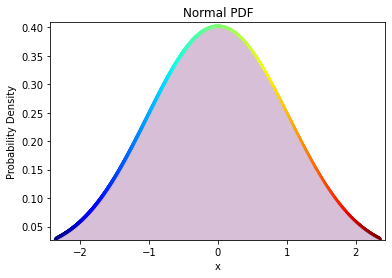

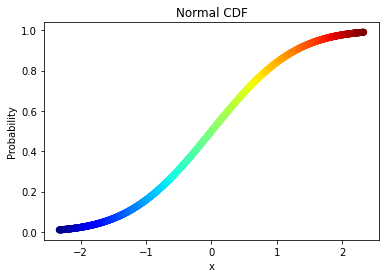

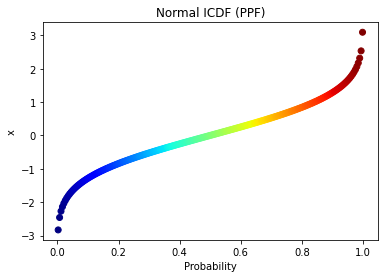

In [5]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

if __name__ == '__main__':
    x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), num=1000)
    y1 = norm.pdf(x)
    plt.figure('PDF')
    plt.xlim(x.min()-.1, x.max()+0.1)
    plt.ylim(y1.min(), y1.max()+0.01)
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.title('Normal PDF')
    plt.scatter(x, y1, c=x, cmap='jet')
    plt.fill_between(x, y1, color='thistle')
    plt.show()
    plt.close('PDF')
    plt.figure('CDF')
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.title('Normal CDF')

    y2 = norm.cdf(x)
    plt.scatter(x, y2, c=x, cmap='jet')
    plt.show()
    plt.close('CDF')
    plt.figure('ICDF')
    plt.xlabel('Probability')
    plt.ylabel('x')
    plt.title('Normal ICDF (PPF)')

    y3 = norm.ppf(x)
    plt.scatter(x, y3, c=x, cmap='jet')
    plt.show()
    plt.close('ICDF')

O código começa importando três bibliotecas — matplotlib, scipy e
numpy. O bloco principal começa criando uma sequência de 1.000 valores
x entre 0,01 e 0,99 (porque as probabilidades devem cair entre 0 e 1).
Em seguida, uma sequência de valores PDF y é criada com base nos
valores x. O código continua plotando o PDF resultante mostrado na Figura
2-7. Em seguida, uma sequência de valores de CDF (Figura 2-8) e ICDF (Figura
2-9) é criada e plotada. A partir da visualização, é mais fácil ver que o PDF
representa todos os possíveis valores de x (probabilidades) que existem
na distribuição normal. Também é mais fácil visualizar o CDF porque
representa o acúmulo de todas as probabilidades possíveis. Finalmente,
o ICDF é mais fácil de entender por meio da visualização (consulte a Figura
2-9) porque o eixo x representa probabilidades, enquanto o eixo y representa
o valor real associado a essas probabilidades.

Vamos aplicar o ICDF. Suponha que você seja um cientista de dados na Apple e seu
chefe peça para você determinar as taxas de falha do Apple iPhone 8 para que ela possa
desenvolver uma apresentação de maquete para seus superiores. Para este exemplo
hipotético, seu chefe espera quatro cálculos: tempo que leva 5% dos telefones para falhar,
intervalo de tempo (intervalo) em que 95% dos telefones falham, tempo em que 5% dos
telefones sobrevivem (não falham) e intervalo de tempo onde 95% dos telefones
sobrevivem. Em todos os casos, informe o tempo em horas. A partir da exploração de
dados, você verifica que o tempo de falha médio (mu) é de 1.000 horas e o desvio padrão (sigma) é de 300

O exemplo de código calcula o ICDF para os quatro cenários e exibe os
resultados em um formato fácil de entender para seu chefe:

In [ ]:
from scipy.stats import norm
import numpy as np

def np_rstrip(v):
    return np.char.rstrip(v.astype(str), '.0')

def transform(t):
    one, two = round(t[0]), round(t[1])
    return (np_rstrip(one), np_rstrip(two))

if __name__ == "__main__":
    mu, sigma = 1000, 300
    
    print ('Expected failure rates:')
    
    fail = np_rstrip(round(norm.ppf(0.05, loc=mu, scale=sigma)))
    print ('5% fail within', fail, 'hours')
    
    fail_range = norm.interval(0.95, loc=mu, scale=sigma)
    lo, hi = transform(fail_range)
    print ('95% fail between', lo, 'and', hi, end=' ')
    print ('hours of usage')
    print ('\nExpected survival rates:')
    
    last = np_rstrip(round(norm.ppf(0.95, loc=mu, scale=sigma)))
    print ('5% survive up to', last, 'hours of usage')
    
    last_range = norm.interval(0.05, loc=mu, scale=sigma)
    lo, hi = transform(last_range)
    print ('95% survive between', lo, 'and', hi, 'hours of usage')

O exemplo de código começa importando as bibliotecas scipy e numpy.
Continua com duas funções. A função np_rstrip() converte float numpy em
string e remove caracteres estranhos. A função transform() arredonda e retorna
uma tupla. Ambos são usados apenas para arredondar números sem casas
decimais para torná-lo fácil de usar para seu chefe fictício. O bloco principal
começa inicializando mu e sigma em 1.000 (falhas) e 300 (variações).
Ou seja, em média, nossos smartphones falham em 1.000 horas, e as falhas variam
entre 700 e 1.300 horas. Em seguida, encontre o valor de ICDF para uma taxa de
falha de 5% e um intervalo em que 95% falham com norm.ppf(). Portanto, espera-se
que 5% de todos os telefones falhem dentro de 507 horas, enquanto 95% falham entre
412 e 1.588 horas de uso. Em seguida, encontre o valor ICDF para uma taxa de
sobrevivência de 5% e um intervalo onde 95% sobrevivem. Assim, 5% de todos os
telefones sobrevivem até 1.493 horas, enquanto 95% sobrevivem entre 981 e 1.019 horas de uso.


Simplesmente, o ICDF permite que você trabalhe para trás a partir de
uma probabilidade conhecida para encontrar um valor x!

Agora, espera-se que 5% de todos os telefones falhem dentro de 951 horas, enquanto 95% falham entre 941 e 1.059 horas de uso. E 5% de todos os telefones sobrevivem até 1.049
horas, enquanto 95% sobrevivem entre 998 e 1.002 horas de uso. O que isto significa?
Menos variação (erro) mostra que os valores estão muito mais próximos da média para as
taxas de falha e sobrevivência. Isso faz sentido porque a variação é calculada a partir de uma
média de 1.000.

Vamos mudar para um exemplo de simulação. Suponha que seu chefe peça a você para
encontrar a quantidade ideal de pedido mensal para um tipo de carro, dado que a demanda é
normalmente distribuída (deve, porque o PDF é baseado nessa suposição), a demanda média
(mu) é 200 e a variação (sigma) é 30. Cada carro custa $ 25.000, é vendido por $ 45.000 e
metade dos carros não vendidos pelo preço normal pode ser vendida por $ 30.000. Como
outros experimentos MCS, você pode modificar o algoritmo de lucro para aumentar o realismo.
Por fornecedores, você está limitado a encomendar quantidades de 160, 180, 200, 220,
240, 260 ou 280.

O MCS é usado para encontrar o lucro de cada pedido com base nas informações oferecido. A demanda é gerada aleatoriamente para cada iteração da simulação. Os
cálculos de lucro por pedido são automatizados executando o MCS para cada pedido.

$3,464,520.00 (profit) for order: 180
$3,640,262.50 (profit) for order: 200
$3,670,002.50 (profit) for order: 220
$3,573,112.50 (profit) for order: 240
$3,387,029.50 (profit) for order: 260
$3,203,810.00 (profit) for order: 280
$3,007,075.50 (profit) for order: 300

Maximum profit $3,670,002.50 for order 220


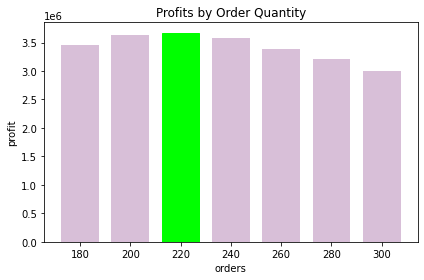

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def str_int(s):
    val = "%.2f" % profit
    return float(val)

if __name__ == "__main__":
    orders = [180, 200, 220, 240, 260, 280, 300]
    mu, sigma, n = 200, 30, 10000
    cost, price, discount = 25000, 45000, 30000
    profit_ls = []

    for order in orders:
        x = 1
        profit_val = []
        inv_cost = order * cost
        while x <= n:
            demand = round(np.random.normal(mu, sigma))
            if demand < order:
                diff = order - demand
    
                if diff > 0:
                    damt = round(abs(diff) / 2) * discount
                    profit = (demand * price) - inv_cost + damt
                else:
                    profit = (order * price) - inv_cost

            else:
                    profit = (order * price) - inv_cost
            profit = str_int(profit)
            profit_val.append(profit)
            x += 1  
        
        avg_profit = np.mean(profit_val)
        profit_ls.append(avg_profit)
        print ('${0:,.2f}'.format(avg_profit), '(profit)',   
            'for order:', order)
    
    max_profit = max(profit_ls)
    profit_np = np.array(profit_ls)
    max_ind = np.where(profit_np == profit_np.max())
    print ('\nMaximum profit', '${0:,.2f}'.format(max_profit),      
           'for order', orders[int(max_ind[0])])
    
    barlist = plt.bar(orders, profit_ls, width=15,  
                      color='thistle')
    
    barlist[int(max_ind[0])].set_color('lime')
    
    plt.title('Profits by Order Quantity')
    plt.xlabel('orders')
    plt.ylabel('profit')
    plt.tight_layout()
    plt.show()

Figura 2-10. Lucros por visualização da quantidade do pedido

O código começa importando numpy e matplotlib. Ele continua com uma função
(str_int()) que converte uma string em float. O bloco principal começa inicializando
pedidos, mu, sigma, n, custo, preço, desconto e lista de lucros por pedido. Ele
continua percorrendo cada quantidade de pedido e executando o MCS com 10.000
iterações. Uma probabilidade de demanda gerada aleatoriamente é usada para
calcular o lucro para cada iteração da simulação. A técnica para calcular o lucro é
bastante simples, mas você pode substituí-la por seu próprio algoritmo. Você
também pode modificar qualquer uma das informações fornecidas com base em
seus próprios dados. Depois de calcular o lucro de cada pedido por meio do
MCS, o código continua encontrando a quantidade do pedido com o maior lucro.
Por fim, o código gera um gráfico de barras para iluminar os resultados por meio da
visualização mostrada na Figura 2-10.

O exemplo de código final cria uma visualização em PDF:

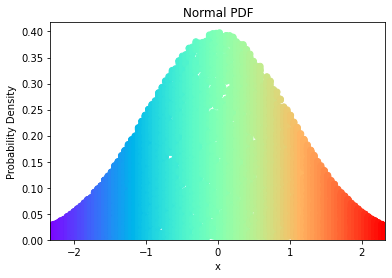

In [12]:
import matplotlib.pyplot as plt, numpy as np
from scipy.stats import norm

if __name__ == '__main__':
    n = 100
    x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), num=n)
    y = norm.pdf(x)
    dic = {}
    
    for i, row in enumerate(y):
        dic[x[i]] = [np.random.uniform(0, row) for _ in range(n)]
    
    xs = []
    ys = []
    for key, vals in dic.items():
        for y in vals:
            xs.append(key)
            ys.append(y)
        
    plt.xlim(min(xs), max(xs))
    plt.ylim(0, max(ys)+0.02)
    plt.title('Normal PDF')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.scatter(xs, ys, c=xs, cmap='rainbow')
    plt.show()

Figura 2-11. Todas as probabilidades em PDF com 100 simulações

O código começa importando as bibliotecas matplotlib, numpy e scipy. O bloco principal começa inicializando o número de pontos que você deseja
plotar, os valores x e y do PDF e um dicionário. Para plotar todas as
probabilidades de PDF, um conjunto de valores gerados aleatoriamente para cada
ponto no eixo x é criado. Para realizar essa tarefa, o código atribui 100 (n = 100)
valores a x de 0,01 a 0,99. Ele continua atribuindo 100 valores de PDF a y. Em
seguida, um elemento de dicionário é preenchido por um par (chave, valor)
que consiste em cada valor x como chave e uma lista de 100 (n = 100) números
gerados aleatoriamente entre 0 e pdf(x) como valor associado a x. Embora o código
que cria o dicionário seja simples, pense com cuidado sobre o que está
acontecendo porque é bastante abstrato. O código continua construindo
pares (x, y) a partir do dicionário. O resultado são 10.000 (100 X 100) (x, y)
pares, onde cada 100 valores x tem 100 valores y associados visualizados na Figura 2-11.

Para suavizar a visualização, aumente n para 1.000 (n = 1.000) no início
do bloco principal:

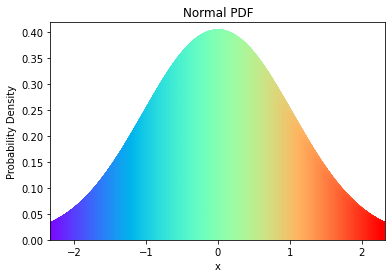

In [3]:
import matplotlib.pyplot as plt, numpy as np
from scipy.stats import norm

if __name__ == '__main__':
    n = 1000
    x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), num=n)
    y = norm.pdf(x)
    dic = {}
    
    for i, row in enumerate(y):
        dic[x[i]] = [np.random.uniform(0, row) for _ in range(n)]
    
    xs = []
    ys = []
    for key, vals in dic.items():
        for y in vals:
            xs.append(key)
            ys.append(y)
        
    plt.xlim(min(xs), max(xs))
    plt.ylim(0, max(ys)+0.02)
    plt.title('Normal PDF')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.scatter(xs, ys, c=xs, cmap='rainbow')
    plt.show()

Figura 2-12. Todas as probabilidades em PDF com 1.000 simulações

Ao aumentar n para 1.000, 1.000.000 (1.000 X 1.000) (x, y) pares são plotados conforme mostrado na Figura 2-12!

In [13]:
%reload_ext watermark
%watermark -a "Caique Miranda" -gu "caiquemiranda" -iv

Author: Caique Miranda

Github username: caiquemiranda

scipy     : 1.8.1
matplotlib: 3.5.2
numpy     : 1.23.0



### End.